## Google Play Store Apps

## Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem Statement
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.

## 2) Data Collection
- The Dataset is collected from https://www.kaggle.com/lava18/google-play-store-apps
- The data consists of 20 column and 10841 rows.

### 2.1 Importing required packages and loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\Sachin Dev\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
### load dataset
df = pd.read_csv('data/google_cleaned.csv')

##### Show Top 5 Rows

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


##### Show Bottom 5 rows

In [4]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device,25,7,2018


### 2.2 Perform Basic functions to know more about data

##### Shape of the dtaa

In [5]:
df.shape

(10840, 16)

We have 10840 rows and 16 columns

In [62]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

###### Summary of the data
- The describe method will give us the summary of the numerical features and tell us how the data has been spread.
- We can get values like minimum, percentiles, max, mean etc.

In [6]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,10840.000000,10840.000000,10840.000000
mean,4.191757,4.441529e+05,21.506534,1.546434e+07,1.027368,15.609041,6.422325,2017.399723
std,0.515219,2.927761e+06,22.596021,8.502936e+07,15.949703,9.561621,2.578388,1.100914
min,1.000000,0.000000e+00,0.010000,0.000000e+00,0.000000,1.000000,1.000000,2010.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000,6.000000,5.000000,2017.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000,16.000000,7.000000,2018.000000
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000,24.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,31.000000,12.000000,2018.000000


######  Summary of categorical columns

In [7]:
df[[feature for feature in df.columns if df[feature].dtypes == 'O']].describe()

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10840,10840,10839,10840,10840,10840,10832,10838
unique,9659,33,2,6,119,1377,2831,33
top,ROBLOX,FAMILY,Free,Everyone,Tools,2018-08-03,Varies with device,4.1 and up
freq,9,1972,10039,8714,842,326,1459,2451


##### Check datatypes and non-null values
- For this we can use info() method

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Day             10840 non-null  int64  
 14  Month           10840 non-null  int64  
 15  Year            10840 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


### 2.3 Check Duplicate values by apps

In [9]:
df.duplicated('App').sum()

1181

There are 1181 duplicate apps in the dataset

In [10]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10719,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10729,FP Notebook,MEDICAL,4.5,410,60.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10752,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


##### dropping duplicate values but we need to keep the first value in the data otherwise it will delete all the records about that app

In [11]:
df = df.drop_duplicates(subset=['App'],keep='first')

In [12]:
df.shape

(9659, 16)

### 3. Exploring Data

#### 3.1 Seperating Numerical and Categorical Columns

In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print(f"There are {len(numeric_features)} numerical features in the dataset: {numeric_features}\n")
print(f"There are {len(categorical_features)} categorical features in the dataset{categorical_features}")

There are 8 numerical features in the dataset: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

There are 8 categorical features in the dataset['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


#### 3.2 Feature information

1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

#### 3.3 Proportion of count data on categorical column

In [14]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("----------------------------------------")

Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64
----------------------------------------
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANC

##### 3.4 Check Cardinal Values i.e. Unique Categories inside each Categorical features

In [15]:
for feature in categorical_features:
    print('feature is {} and num of categories are {}'.format(feature,len(df[feature].unique())))

feature is App and num of categories are 9659
feature is Category and num of categories are 33
feature is Type and num of categories are 3
feature is Content Rating and num of categories are 6
feature is Genres and num of categories are 118
feature is Last Updated and num of categories are 1377
feature is Current Ver and num of categories are 2818
feature is Android Ver and num of categories are 34


### 4. Univariate Analysis

#### Check Distribution of Numerical Features 

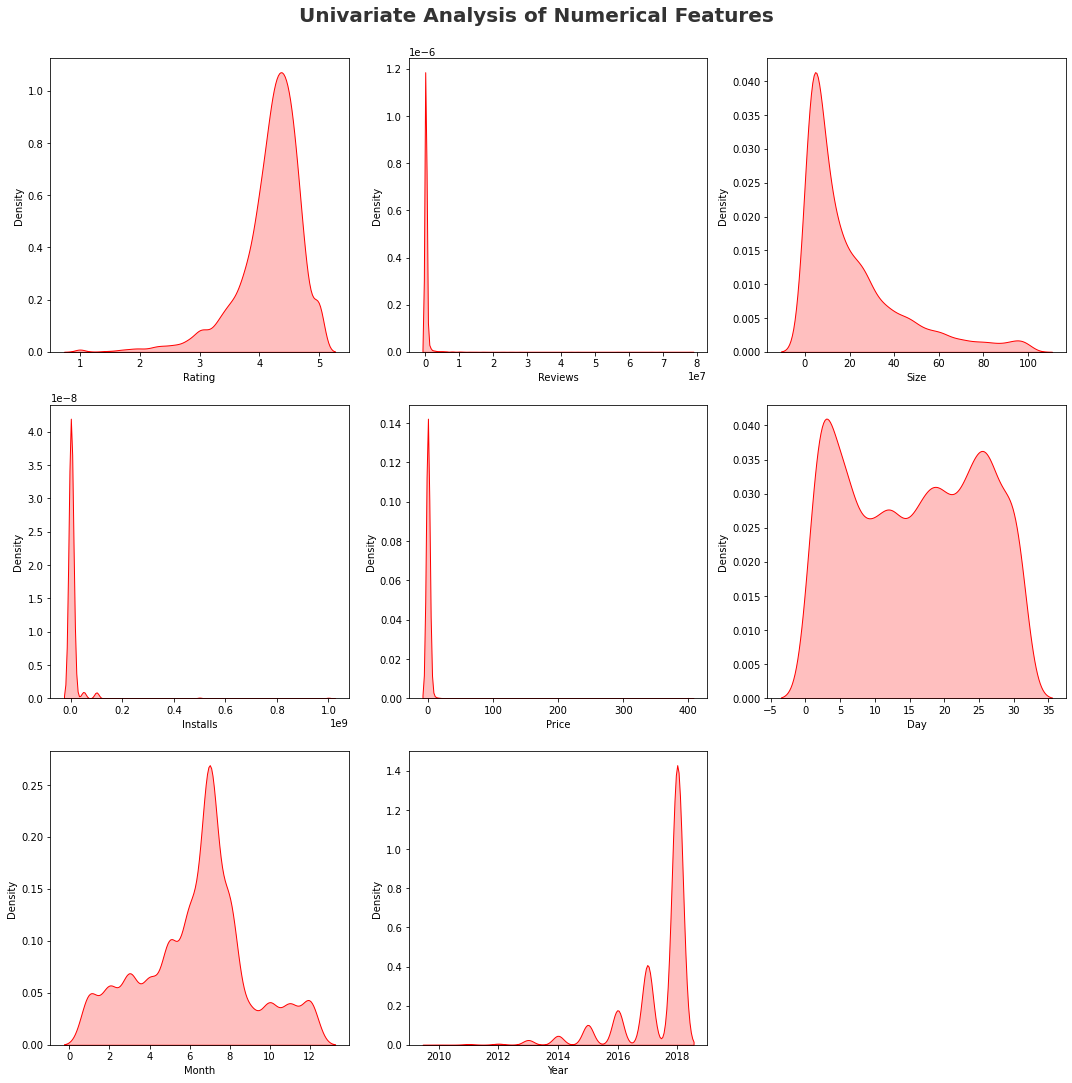

In [16]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Observations**
- Rating and year are left skewed while Reviews,size,installs,price are right skewed.
- We can chekc for outliers in these columns.

##### Check Outliers in Numerical Features

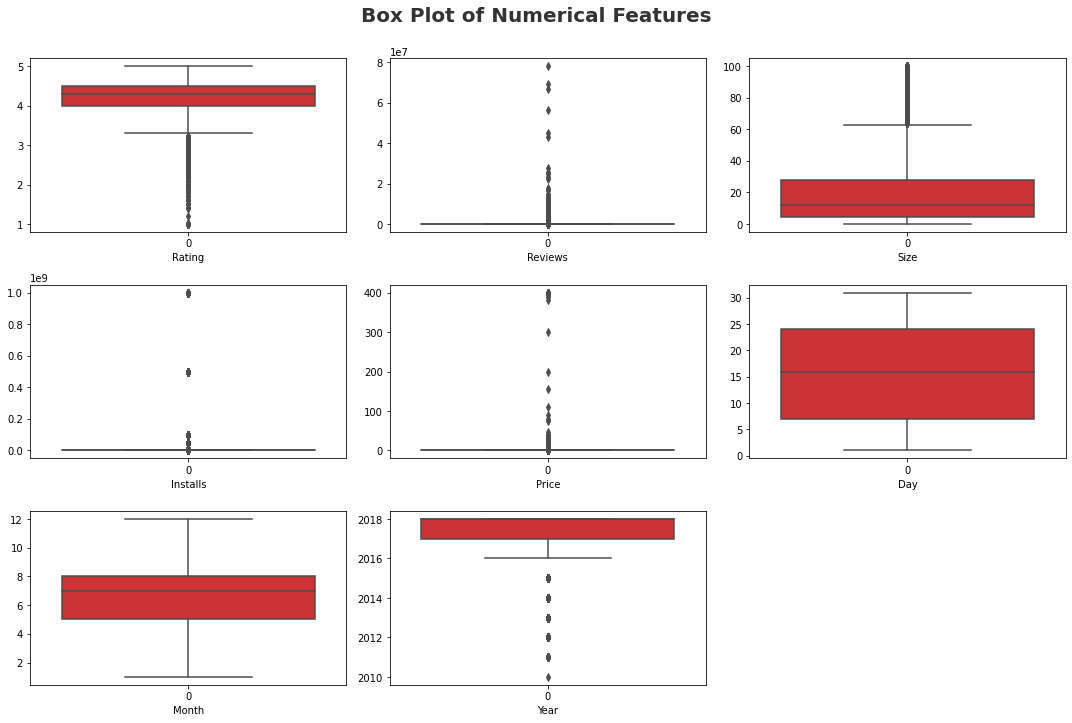

In [17]:
plt.figure(figsize=(15,10))
plt.suptitle("Box Plot of Numerical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df[numeric_features[i]],orient='v',palette="Set1")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

##### Univariate Analysis of Categorical Features

In [18]:
for feature in categorical_features:
    print('feature is {} and num of categories are {}'.format(feature,len(df[feature].unique())))

feature is App and num of categories are 9659
feature is Category and num of categories are 33
feature is Type and num of categories are 3
feature is Content Rating and num of categories are 6
feature is Genres and num of categories are 118
feature is Last Updated and num of categories are 1377
feature is Current Ver and num of categories are 2818
feature is Android Ver and num of categories are 34


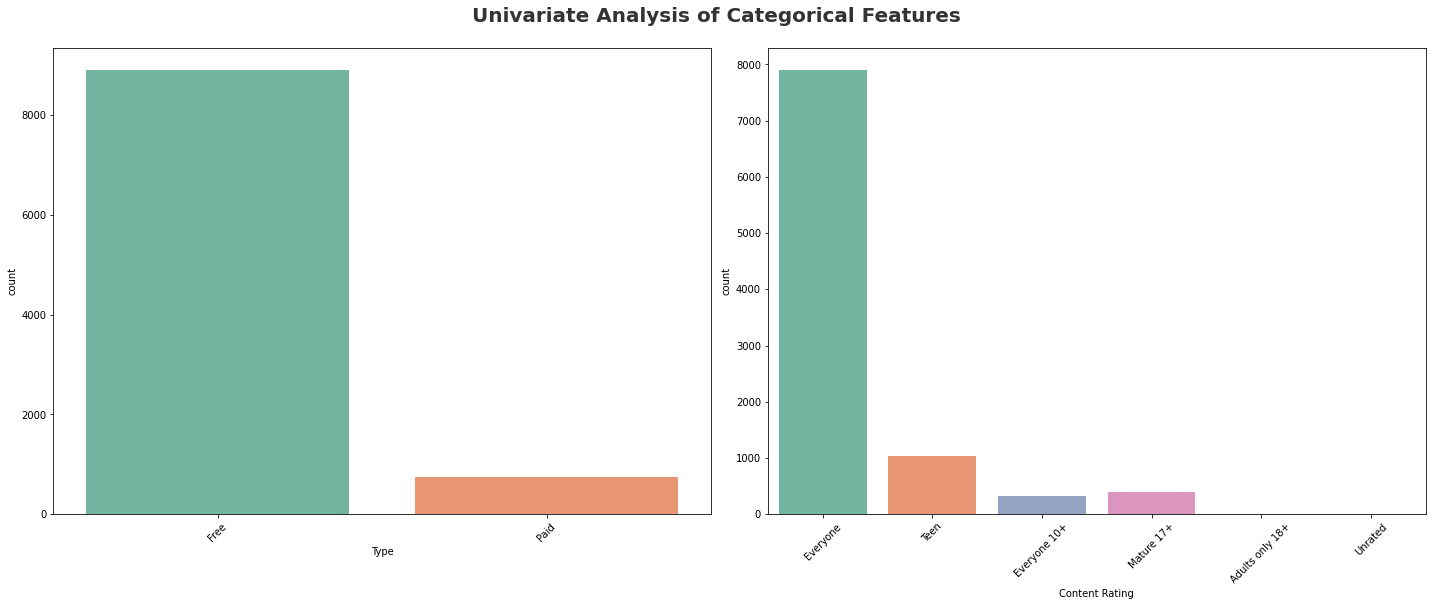

In [19]:
### I am taking only categories contebt rating and type as other columns have lot of categories and it's not possible to show this much categories in a grpah
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1)
category = ['Type','Content Rating']

for i in range(len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[category[i]],palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

##### Most Popular app category

In [21]:
df['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot: title={'center': 'Distribution of apps by category'}>

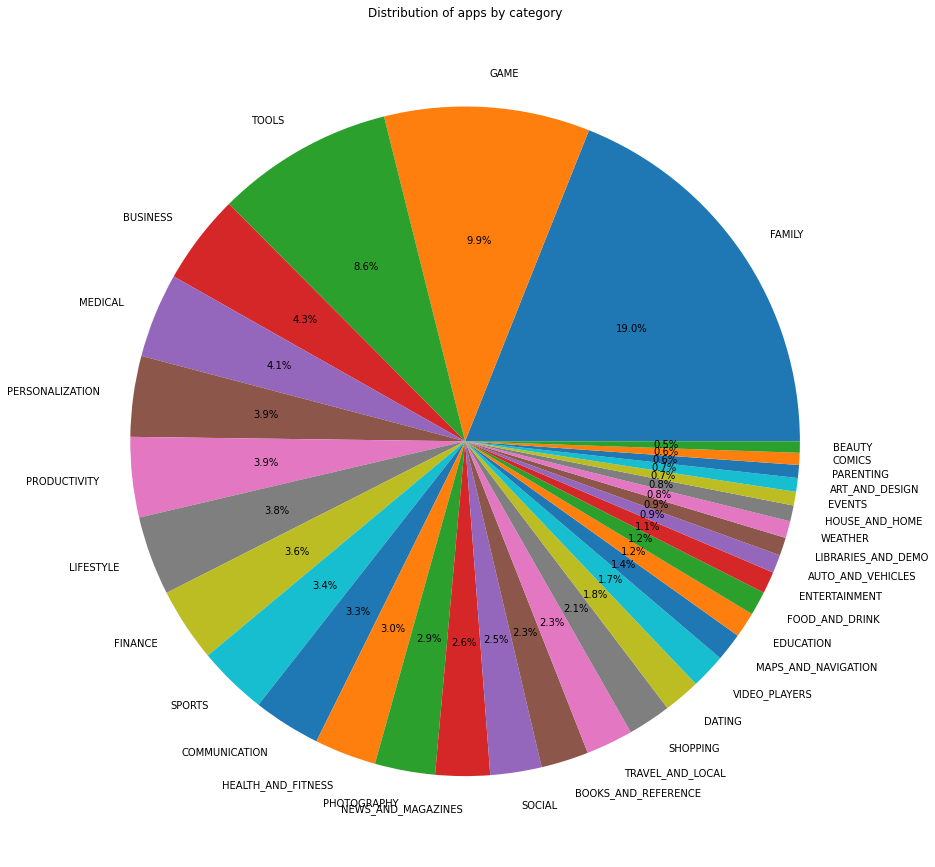

In [22]:

df['Category'].value_counts().plot.pie(y = df['Category'], figsize = (15, 16), label = '', autopct = '%1.1f%%', title = 'Distribution of apps by category')

**Observations**
- Almost 39% of the apps falls under tha categories Family, Games and tools.
- Beauty,comics,parenting,art&design apps are very less in playstore.

##### Top 10 APP Categories

In [24]:
df['Category'].value_counts()[0:10]

FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: Category, dtype: int64

In [25]:
category = pd.DataFrame(df['Category'].value_counts()) 
## renaming category to count
category.rename(columns = {'Category':'Count'},inplace=True)

In [26]:
category[0:10]

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


**Difference Between Countplot and Barplot**
- In simple terms, countplot plots the count of the number of records by category.
- A barplot on the other hand plots a value or metric for each category. Also, by default, a barplot plots the mean of a variable by category.

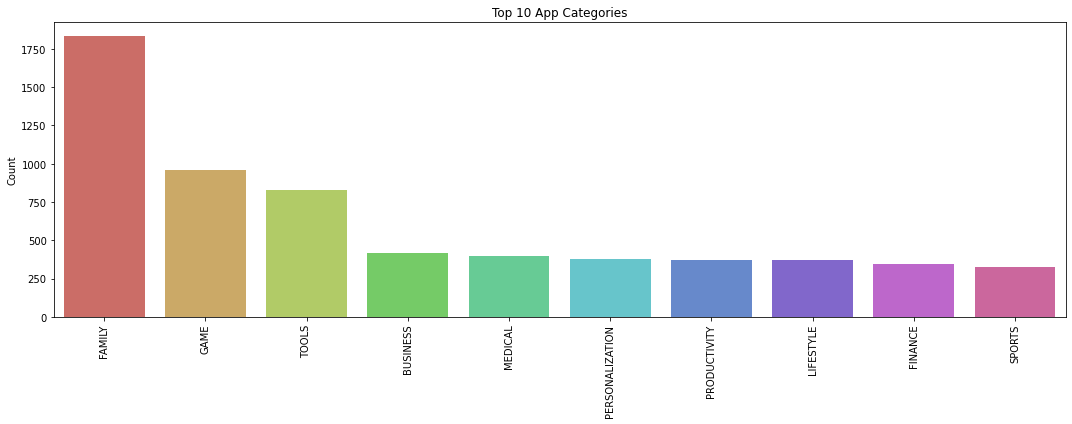

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10],y='Count',data=category[0:10],palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.tight_layout()

**Observations**
- Family category has the most number of apps with 19% of apps belonging to it, followed by Games category which has 9.99% of the apps.
- Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

In [28]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


### 5 Bivariate Analysis

##### Which Category has highest number of installations

In [29]:
df_cat_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()

In [30]:
df_cat_installs

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


In [31]:
df_cat_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
df_cat_installs['Installs'] = df_cat_installs['Installs']/1000000000# converting into billions
df2 = df_cat_installs.head(10)

In [32]:
df2

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


Text(0.5, 1.0, 'Categories with highest num of installations in Playstore')

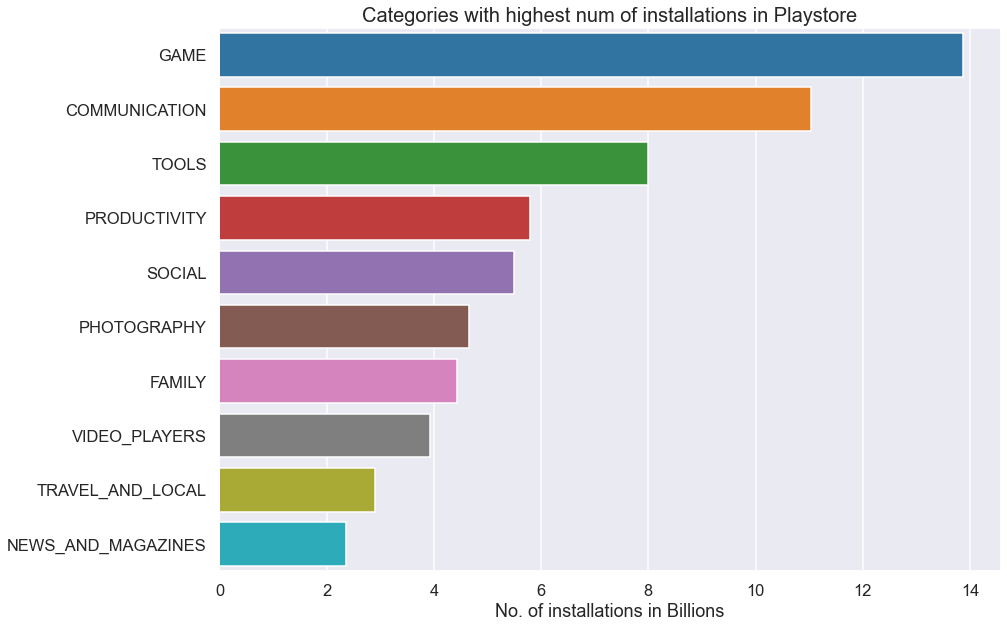

In [33]:
plt.figure(figsize=(14,10))
sns.set_context('talk')
sns.set_style('darkgrid')

sns.barplot(x='Installs',y='Category',data=df2)
plt.xlabel('No. of installations in Billions')
plt.ylabel('')
plt.title('Categories with highest num of installations in Playstore',fontsize=20)

**Observations**
- Out of all the categories "GAME" has the most number of Installations.
- GAME is the most popular category.

##### Top 5 most installed apps in each popular category

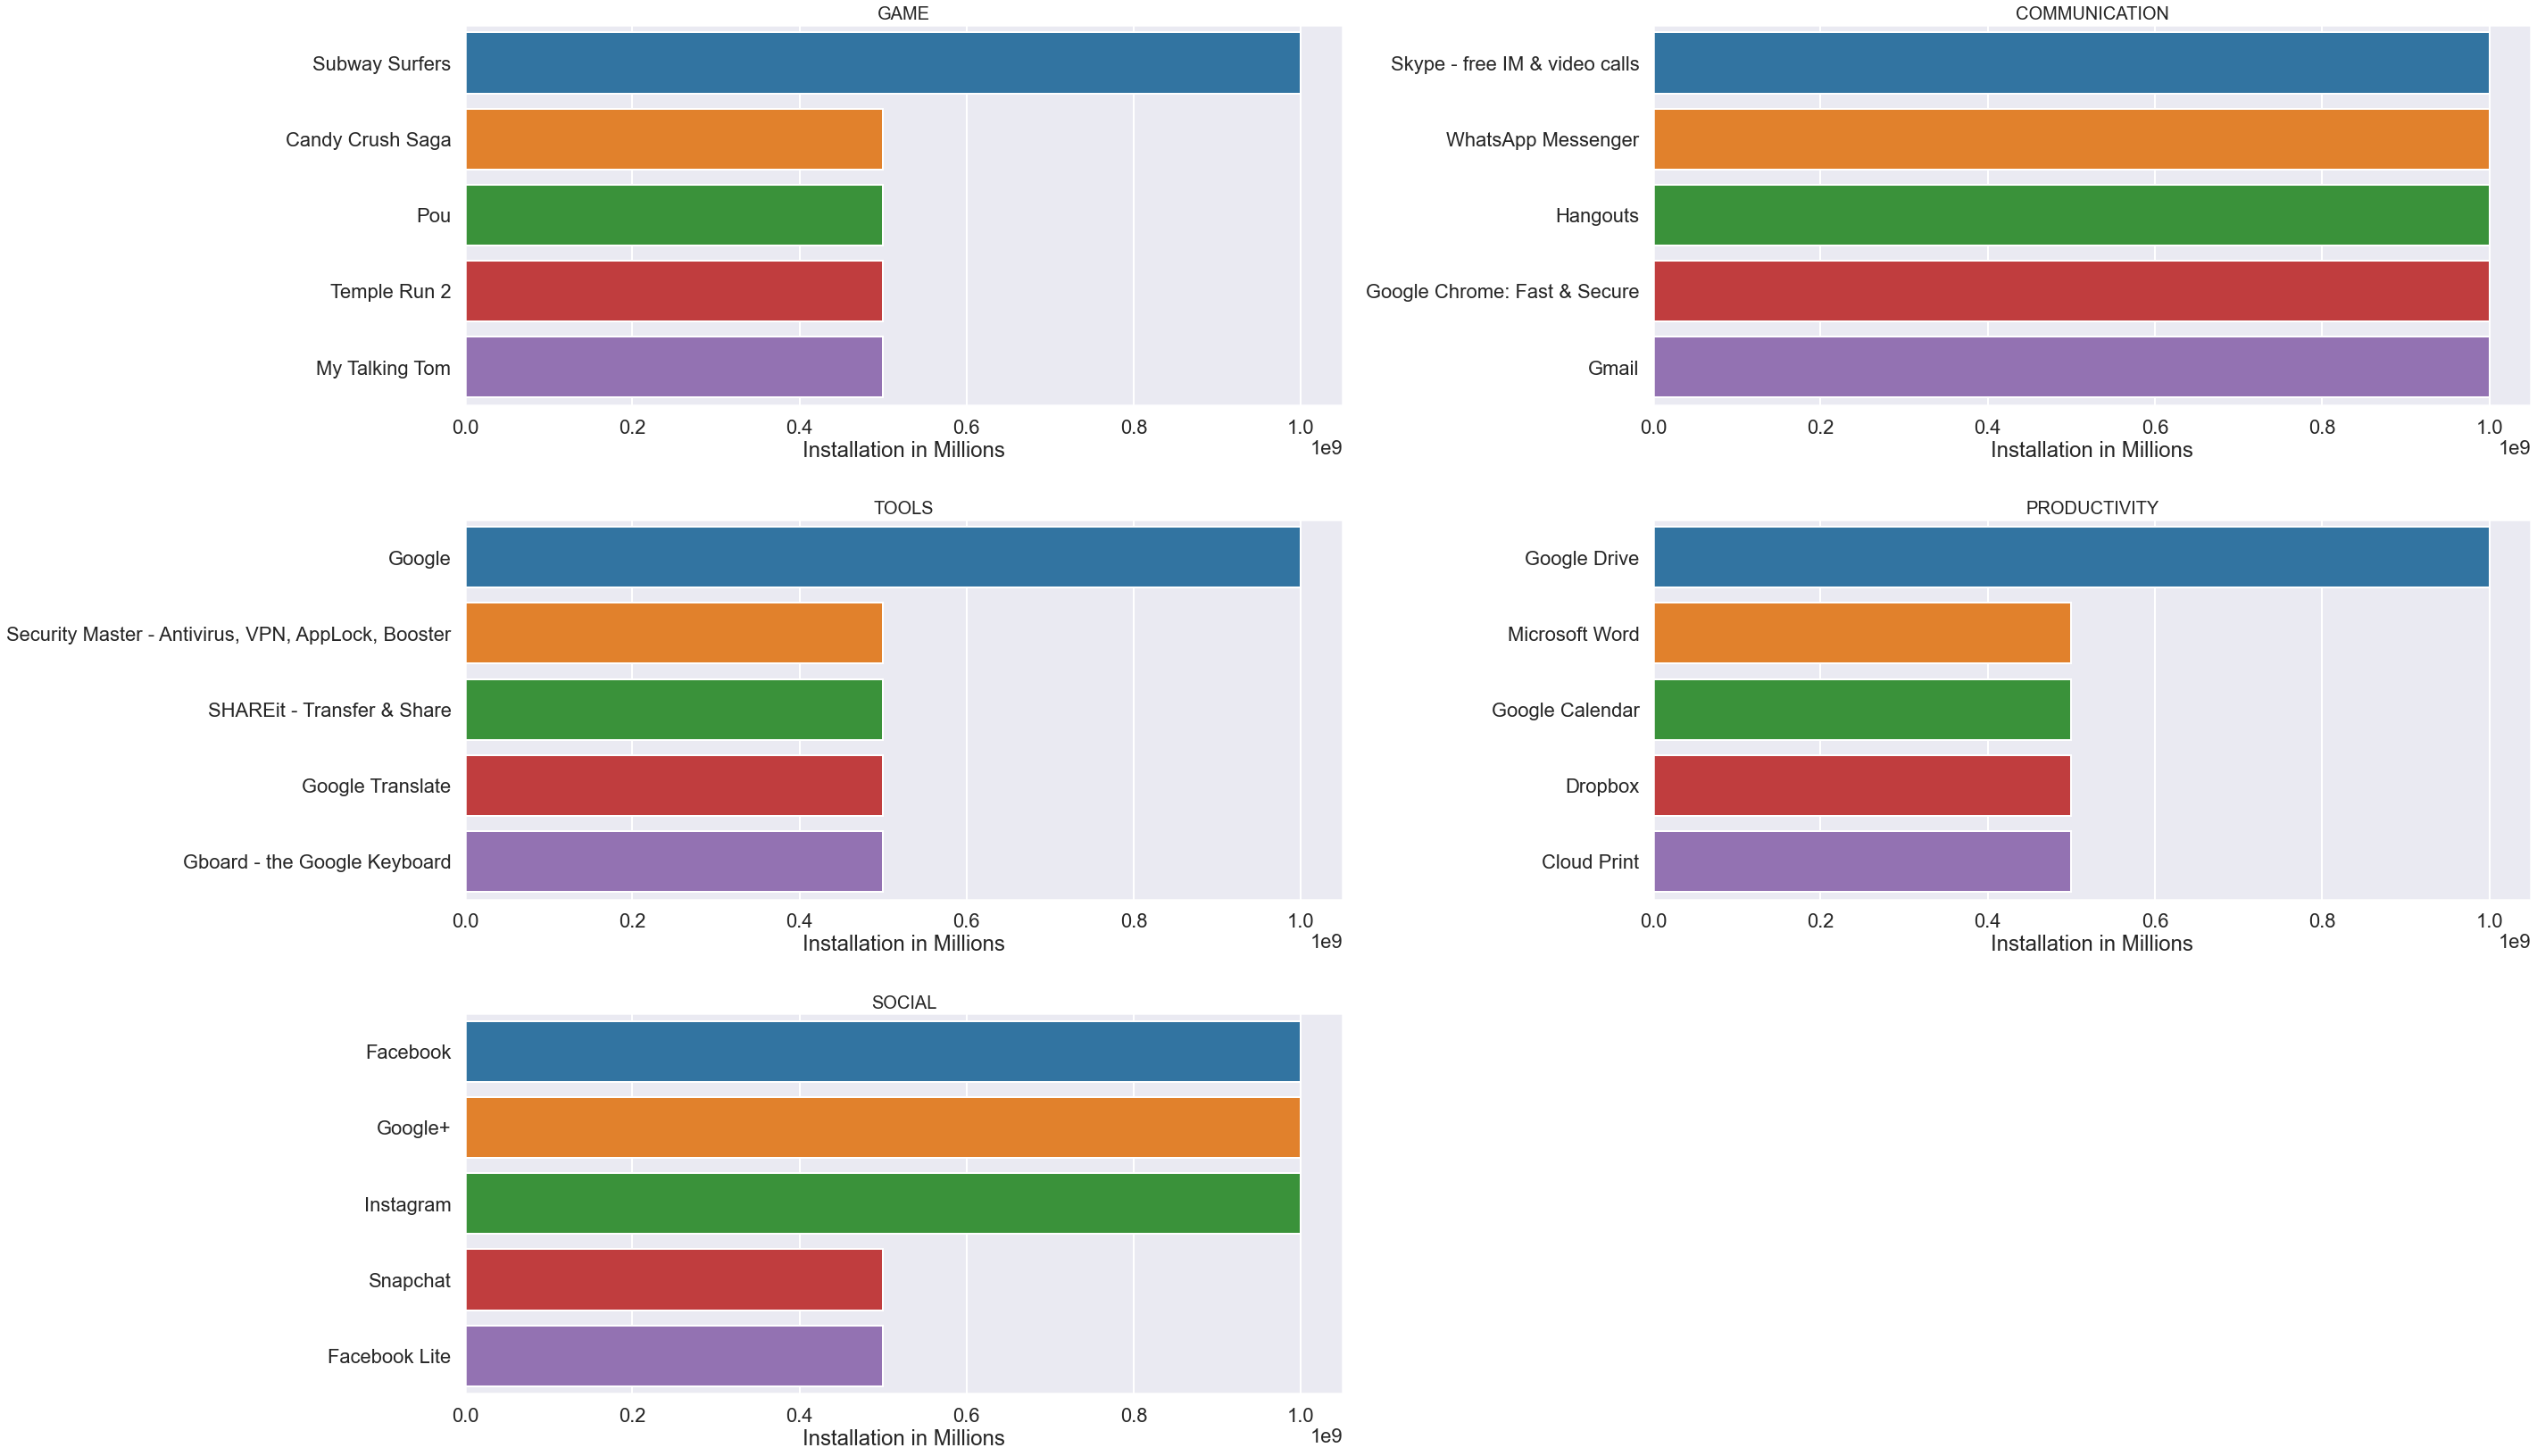

In [34]:
dfa = df.groupby(['Category','App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs',ascending=False)
categories = ['GAME', 'COMMUNICATION','TOOLS','PRODUCTIVITY','SOCIAL']

sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(categories):
    df2 = dfa[dfa['Category'] == app]
    df3 = df2.head(5) ##only top 5 records
    plt.subplot(4,2,i+1)
    sns.barplot(data=df3,x='Installs',y='App')
    plt.xlabel("Installation in Millions")
    plt.ylabel('')
    plt.title(app,size=20)
    
plt.tight_layout()
plt.subplots_adjust(hspace = .3) ### hspace is the height of padding in each subplot
plt.show()

**Observations**
- Here this graph don't look right as we cannot have same values for so many apps but my main focus is getting the most popular apps in each categories.
- Most popular game is subway surfers
- Most popular communation and productivity apps are skype and google drive respectively.
- Google and Facebook are popular in Tools and Social category respectively.

##### Apps with 5 Rating 

In [40]:
rating = df.groupby(['Category','Installs','App'])['Rating'].sum().sort_values(ascending=False).reset_index()
rating

,Category,Installs,App,Rating
0,FAMILY,1000,CS & IT Interview Questions,5.0
1,DATING,100,Online Girls Chat Group,5.0
2,FAMILY,10,Chronolink DX,5.0
3,DATING,500,Spine- The dating app,5.0
4,MEDICAL,5,Clinic Doctor EHr,5.0
...,...,...,...,...
9654,TOOLS,100,CG Wizard,0.0
9655,TOOLS,100,CG 3D Model Viewer: view 3D models interactively,0.0
9656,BUSINESS,100,CS,0.0
9657,TOOLS,100,CD View Lite,0.0


In [41]:
rating = df.groupby(['Category','Installs','App'])['Rating'].sum().sort_values(ascending=False).reset_index()

## now i need apps woth 5 rating
toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])

Number of 5 rated apps 271


In [44]:
toprating_apps.head(1)

,Category,Installs,App,Rating
0,FAMILY,1000,CS & IT Interview Questions,5.0


**Observations**
- There are 271 five rated apps on Google Play store
- Top most popular is 'CT Brain Interpretation' from 'Family' Category

##### Does the Size of application has any impact on it's popularity?

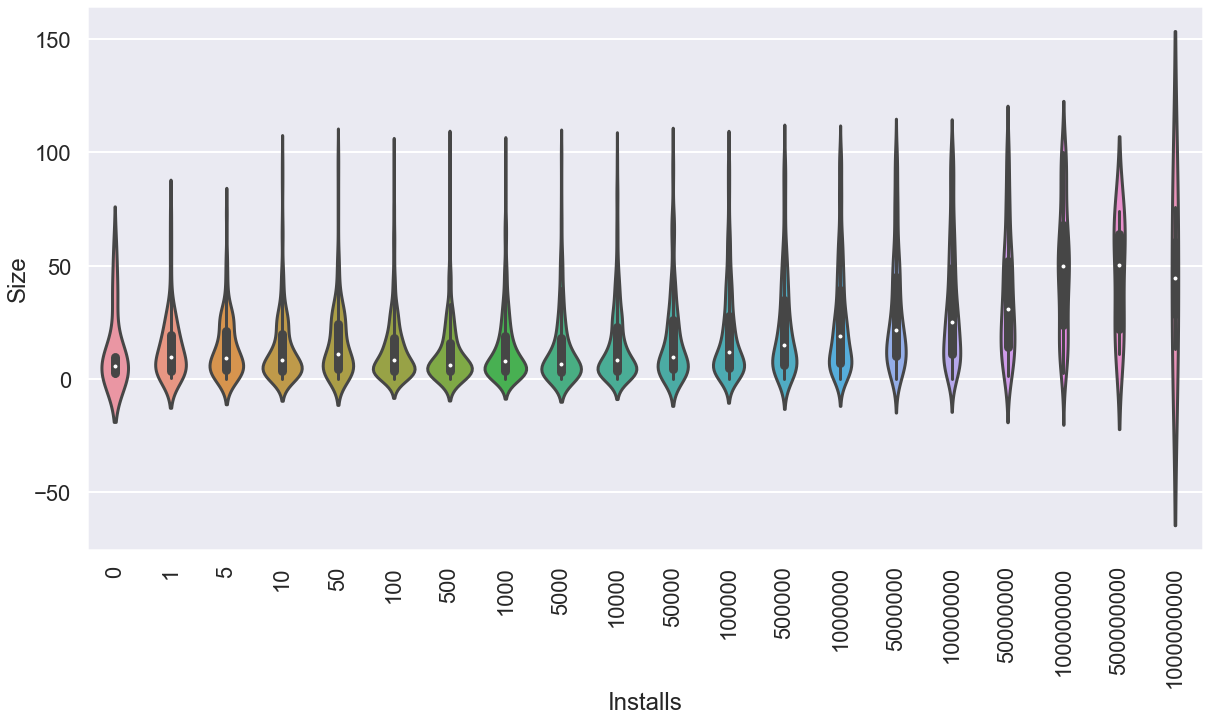

In [45]:
### using violin plot to show the relationship
plt.figure(figsize=(20,10))
sns.violinplot(x=df.Installs, y=df.Size)
plt.xticks(rotation=90)
plt.show()

#### Insights
- We can observe from the plot that there is a large impact by the size of the app on the number of installations.
- The tiny white circle in middle of each plot shows the median value of each value of installations.
- Across the plot, we can see the median grows steadliy higher.
- Initially on Install axis, there is a higher number of outliers with respect to the size of the apps.
- As we progress across the Install axis, the number of outliers decreases and the number of installations increases.
- As the number of installations reaches the maximum value, we see that the app size has reached the lowest values, peaking at posiibly, 100 -110 MB.
* **From this we can conclude that bigger the app, lesser the chance for it to be installed**

##### Paid Apps Vs Categories

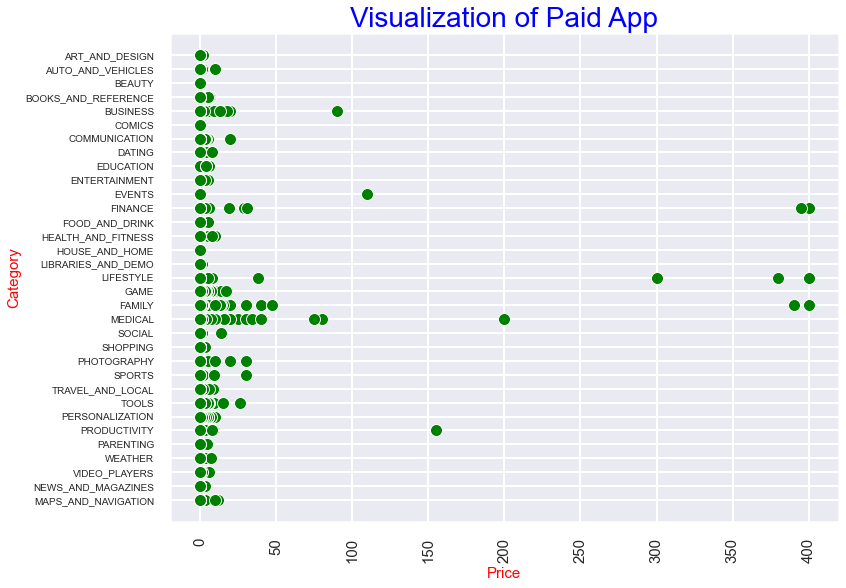

In [46]:
plt.figure(figsize=(12,9))
sns.scatterplot(data=df,y='Category',x='Price',color='g')
plt.xticks(rotation='vertical',size=15)
plt.yticks(size=10)
plt.xlabel("Price",size=15,c='r')
plt.ylabel("Category",size=15,c="r")
plt.title("Visualization of Paid App",size=28,c="b")
plt.show()

**Observations**
- Most of the apps are either free or costs very less
- Paid apps are very less
- Some apps from Finance, lifestyle and famile categories are expensive.

In [47]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


##### Which Category have most reviews? 

In [49]:
df_installs_reviews = df.groupby('Category').agg({'Installs':'sum', 'Reviews':'sum'})
df_installs_reviews.head()

,Installs,Reviews
Category,,
ART_AND_DESIGN,114338100,1419203
AUTO_AND_VEHICLES,53130211,1163666
BEAUTY,27197050,396240
BOOKS_AND_REFERENCE,1665969576,16721314
BUSINESS,697164865,9890245


In [51]:
df_installs_reviews = df.groupby('Category').agg({'Installs':'sum', 'Reviews':'sum'})
df_installs_reviews['Review Percent'] = (df_installs_reviews['Reviews']/df_installs_reviews['Installs'])*100

reviews_df = df_installs_reviews.sort_values(by='Review Percent', ascending=False)
reviews_df.head()

,Installs,Reviews,Review Percent
Category,,,
COMICS,44981150,2342071,5.206783
GAME,13878924415,622298709,4.483768
SOCIAL,5487867902,227927801,4.153303
EDUCATION,352952000,13364148,3.786392
MAPS_AND_NAVIGATION,503281890,17729148,3.522707


Text(0, 0.5, 'Percentage(%)')

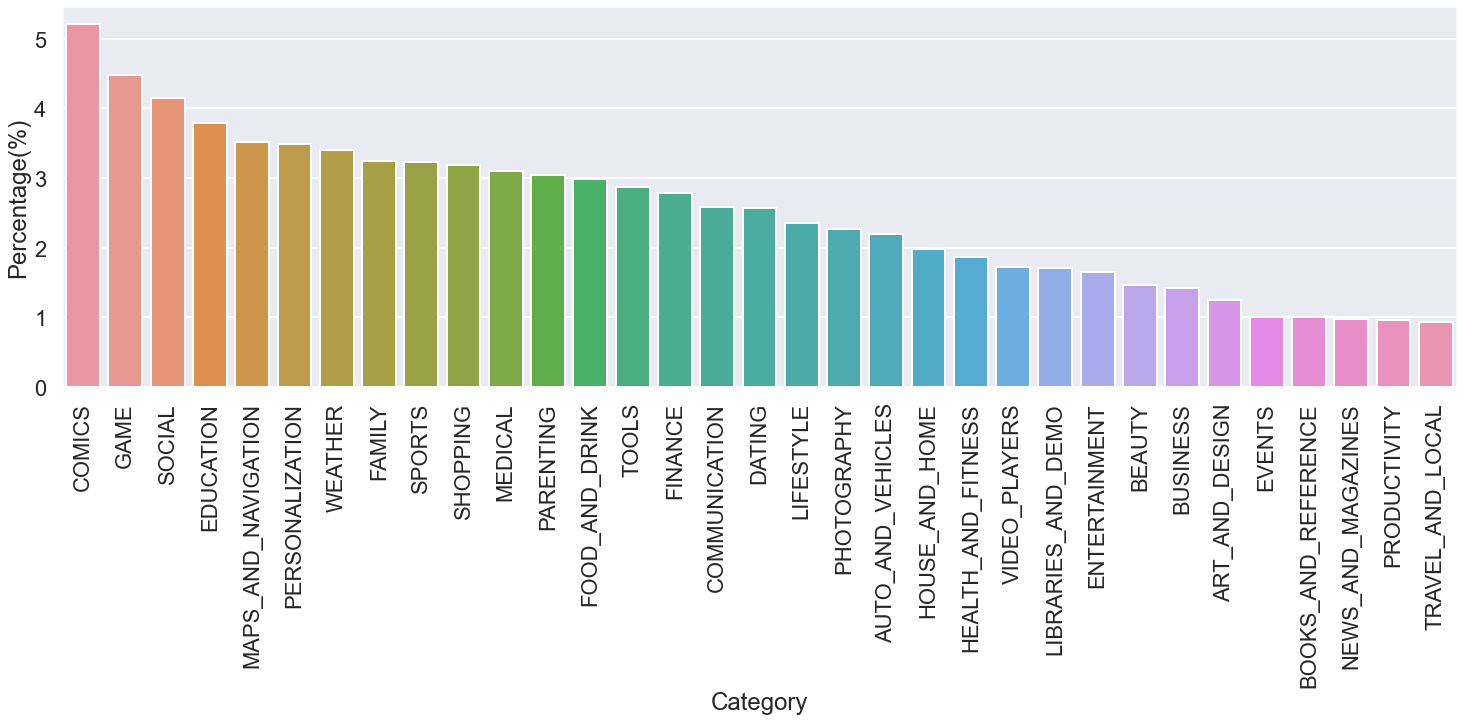

In [55]:
plt.figure(figsize=(25,7))
sns.barplot(data=reviews_df,y=reviews_df['Review Percent'], x=reviews_df.index)
plt.xticks(rotation=90)
plt.ylabel('Percentage(%)')

**Insights**
- Users downloading "Comics" with higher rate to leave a review but with relative high spread of the rating comparing with others.
- "Comic" ranks 6 in the number of installation.
- The two categories with high download rate are having relatively low review rate.

##### What kind of apps users download the most - paid or free?
- As free apps are more in number than paid so I will use percentage to compare

<AxesSubplot: title={'center': 'Percentage of Installations for Free and Paid Apps'}, ylabel='Installs'>

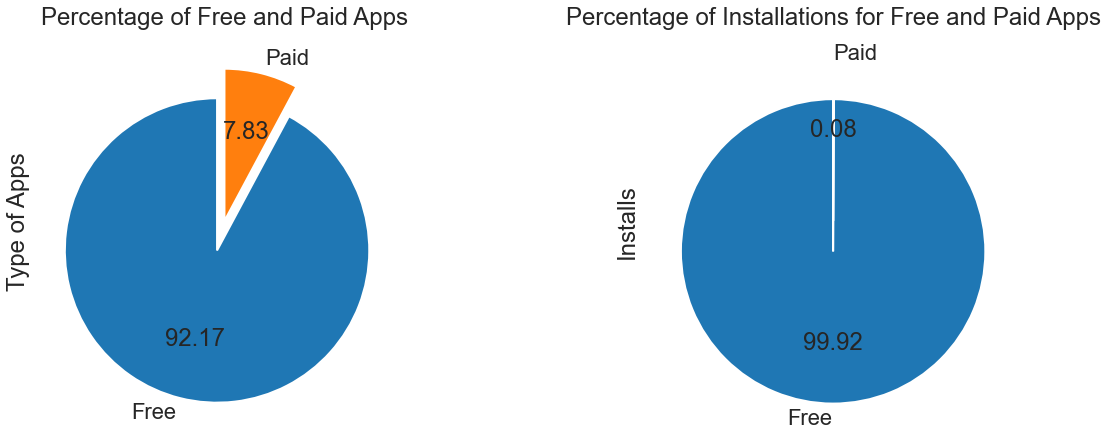

In [56]:
fig,ax = plt.subplots(1,2,figsize=(20,7))
df.value_counts('Type').plot.pie(y='Type', startangle=90, explode=(0.2,0),title='Percentage of Free and Paid Apps',legend=False,autopct='%.2f',ax=ax[0])
ax[0].set(ylabel='Type of Apps')
df.groupby('Type').agg({'Installs':sum}).plot.pie(y='Installs',startangle=90,explode=(0.2,0),title='Percentage of Installations for Free and Paid Apps',legend=False, autopct='%.2f',ax=ax[1])

**Observations**
- More than 92% apps are free on Google Play Store.
- More than 99% of installs belongs Free apps.
- Less than 1% installed apps are paid.

##### Which Apps has good ratings on google play store?

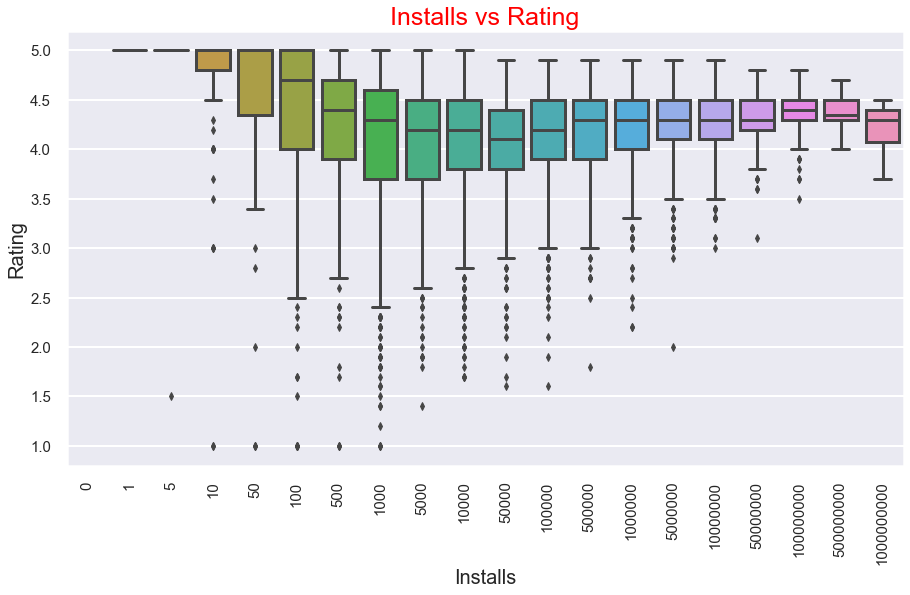

In [57]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Installs", y="Rating", data=df)
plt.title("Installs vs Rating",size=25,c="r")
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)
plt.xlabel("Installs",size=20)
plt.ylabel("Rating",size=20)
plt.show()

**Observations**
- Apps with maximum installs have good rating more than 3.5
- Most of the apps have rating betqween 3 to 4.5

##### Which Category Apps have largest size?

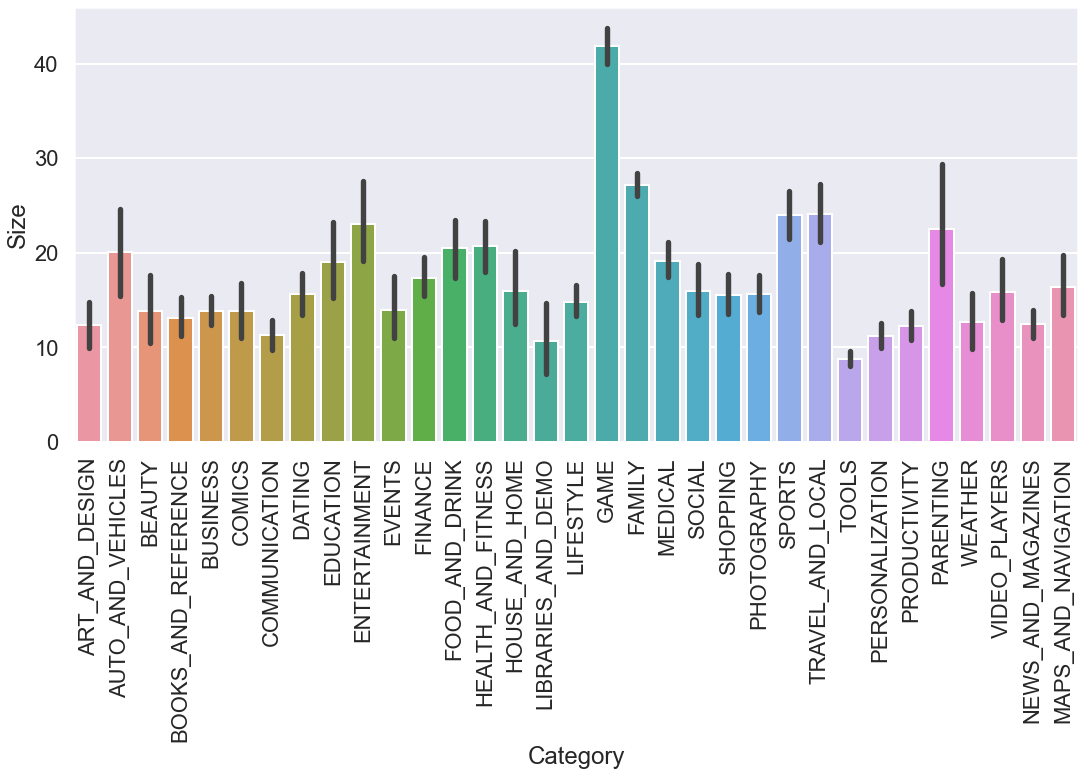

In [59]:
plt.subplots(figsize = (18,8))
plt.xticks(rotation = 90)
sns.barplot(x='Category',y='Size', data = df)
plt.show()

**Observatrions**
- As is evident that GAME category has the largest size.
- We have seen that an average game size exceeds 35MB. Some games are also in the order of GBs.
- The FAMILY apps have the second largest size.

[Text(0, 0.5, 'Standard Deviation')]

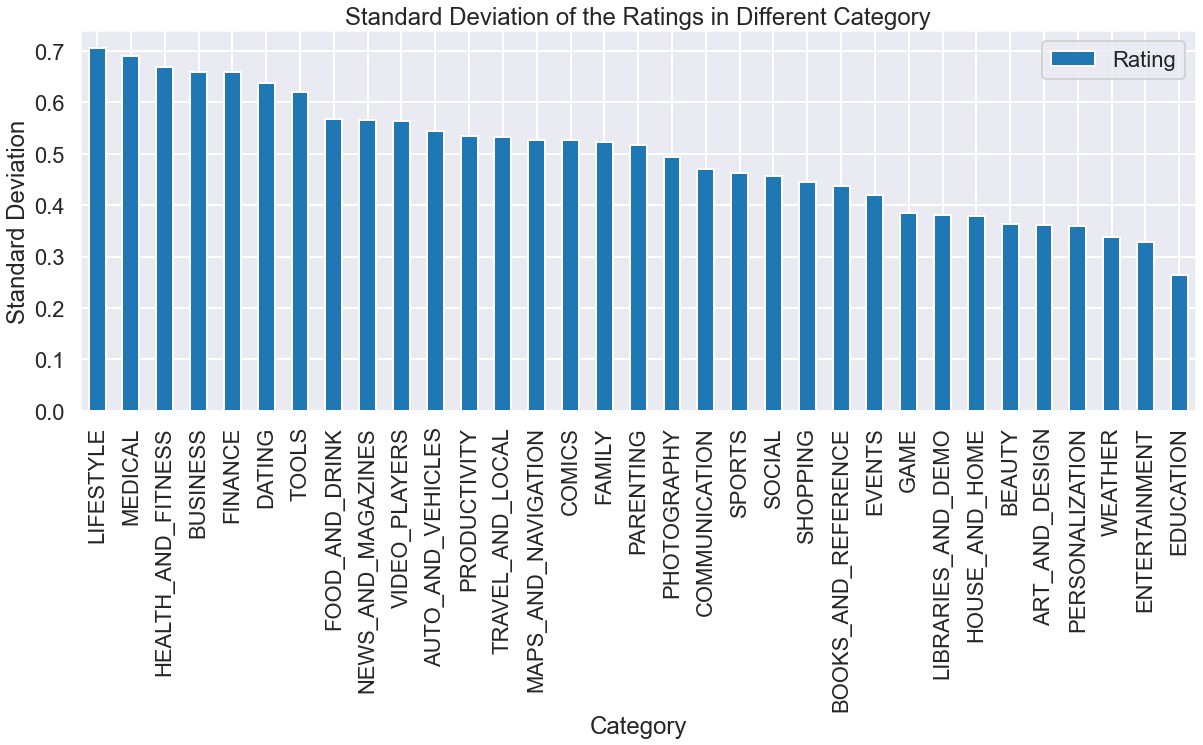

In [60]:
Category_rating= df.groupby('Category').agg({'Rating':'std'}).sort_values('Rating',ascending=False).plot(kind='bar',figsize=(20,7),title='Standard Deviation of the Ratings in Different Category')
Category_rating.set(ylabel='Standard Deviation')

**Observations**
- "Education" has the lowest standard deviation of the rating which means the spread of the rating in this category is narrower than others
- "Lifestyle" is with the highest standard deviation.

##### Check if app size has any impact on Reviews and Ratings?

Text(0.5, 0, 'Size')

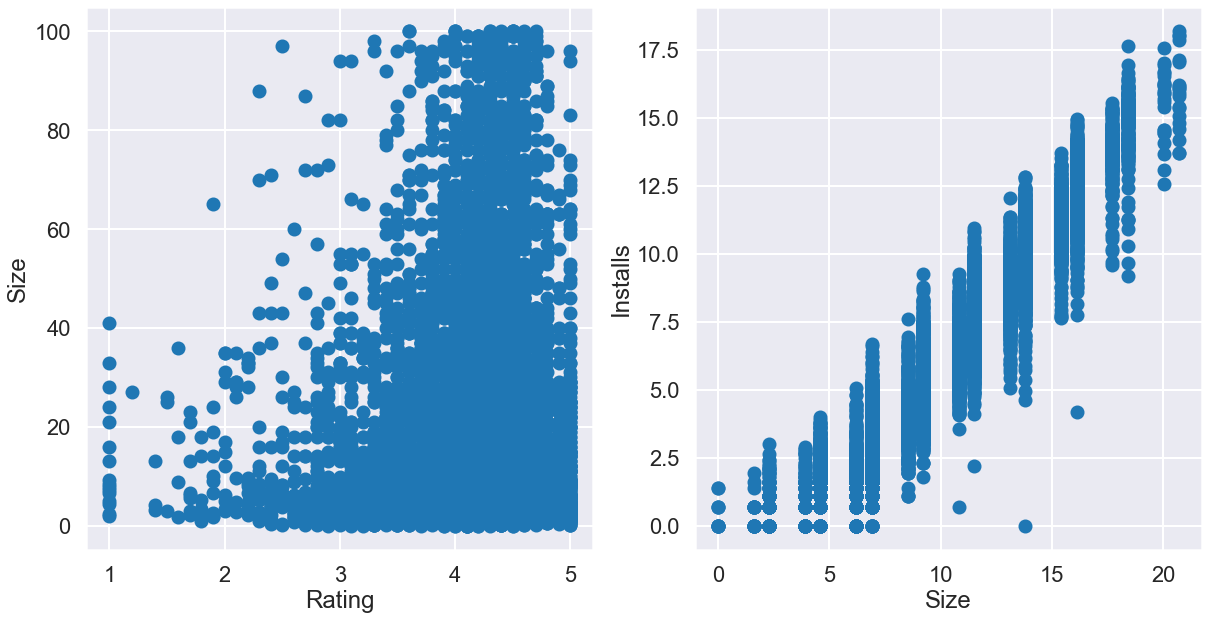

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].scatter(df['Rating'], df['Size'])
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Size')
ax[1].scatter(x=df['Installs'].apply(np.log), y = df['Reviews'].apply(np.log))
ax[1].set_ylabel('Installs')
ax[1].set_xlabel('Size')

**Observations**
- As the Size of app increases Rating Decreases
- Area where App size id less than or equal to 40MB is crowded
- In the second plot, there is linear relationship between size and installs
- As the size increases, installation also increases

##### Apps with most number of reviews and its number of reviews

In [71]:
df[df['Reviews'] == df['Reviews'].max()][['App', 'Reviews']]

,App,Reviews
2544,Facebook,78158306


In [72]:
app_most_reviews = df[df['Reviews'] == df['Reviews'].max()][['App', 'Reviews']].reset_index(drop=True)
app_most_reviews

,App,Reviews
0,Facebook,78158306


In [73]:
print('App with most no of reviews is: {}'.format(app_most_reviews['App'][0]))
print('And it has {} reviews'.format(app_most_reviews['Reviews'][0]))

App with most no of reviews is: Facebook
And it has 78158306 reviews


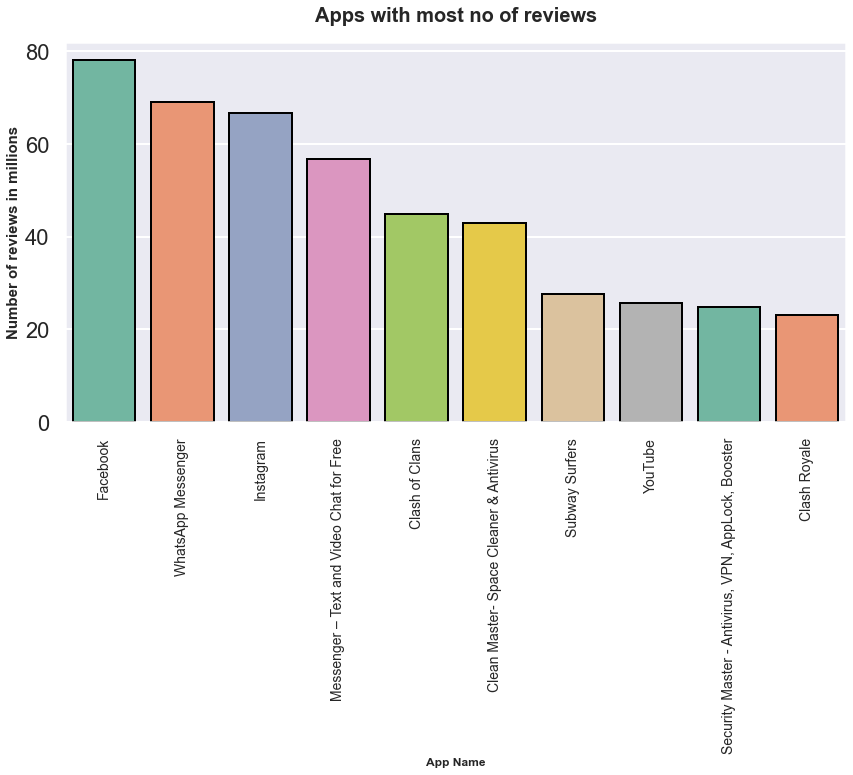

In [75]:
plt.subplots(figsize=(14,7))
reviews_data = df.sort_values('Reviews', ascending=False)[['App','Reviews']][:10]
reviews_data['Reviews'] = reviews_data['Reviews']/10**6 ### converting to millions

sns.barplot(x=reviews_data.App, y=reviews_data.Reviews, ec='black', palette='Set2')
plt.xticks(rotation=90,size=14)
plt.title("Apps with most no of reviews", weight="bold",fontsize=20, pad=20)
plt.ylabel("Number of reviews in millions", weight="bold", fontsize=15)
plt.xlabel("App Name", weight="bold", fontsize=12)
plt.show()

**Observations**
- Facebook app has largest number of reviews followed by whatsapp

##### Time Seriesd graph for Last update

Text(0.5, 1.0, 'Time series plot of Last Updates')

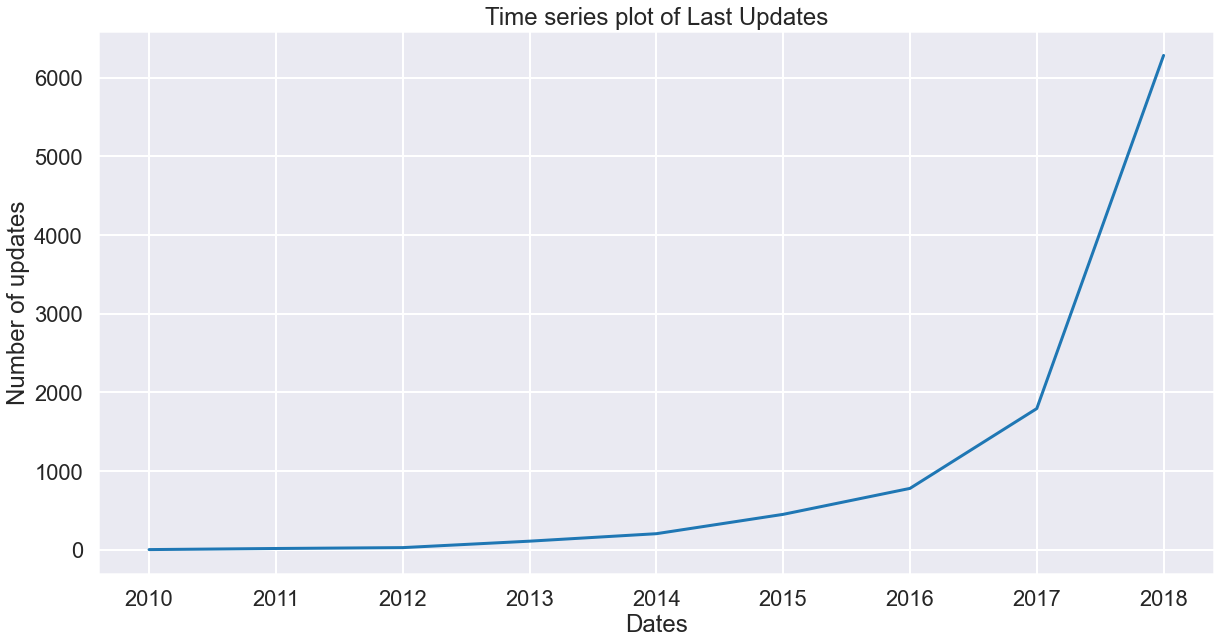

In [76]:
plt.subplots(figsize=(20,10))
freq= pd.Series()
freq=df['Year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

**Observations**
- After 2012 , with year number of updates are also increasing
- Last Updates are increasing almost exponentially

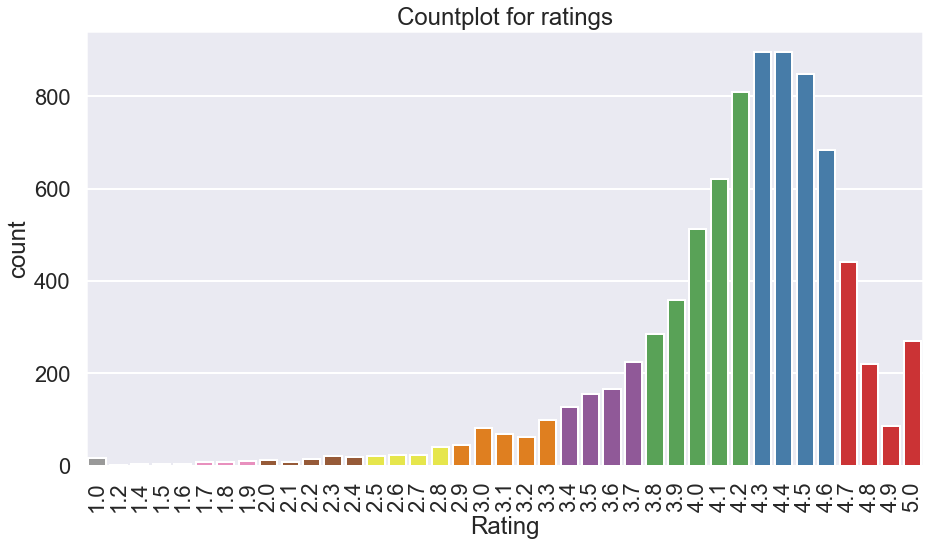

In [78]:
plt.figure(figsize=(15,8))
sns.countplot(x='Rating',data = df,palette="Set1_r")
plt.xticks(rotation =90)
plt.title('Countplot for ratings')             
plt.show()

In [79]:
rating_greater_4 = len(df[df['Rating'] >= 4])/len(df)*100
print('Percentage of Apps having ratings of 4 or greater: {}%'.format(round(rating_greater_4,2)))

Percentage of Apps having ratings of 4 or greater: 65.08%


**Observations**
- Majority of apps in the playstore have a rating 4 or above

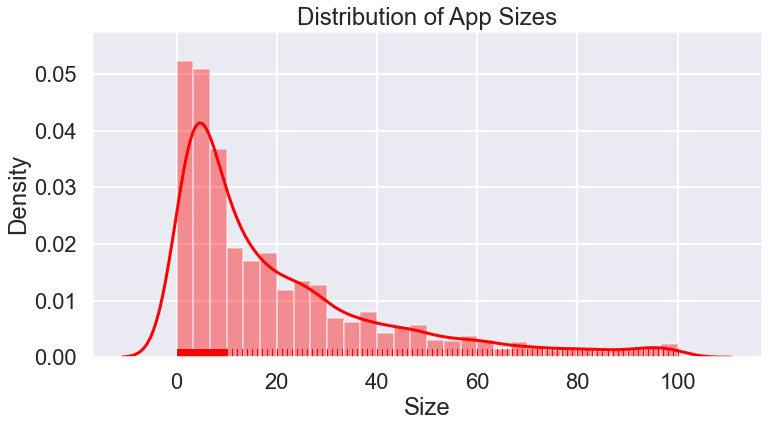

In [80]:
plt.figure(figsize=(12,6))
plt.title('Distribution of App Sizes')
sns.distplot(df['Size'],bins = 30,rug=True,color="Red")
plt.show()

In [83]:
size_less_50 = len(df[df['Size'] <= 50 ])/len(df)*100
print('Percentage of Apps in the beauty category: {}%'.format(round(size_less_20,2)))

Percentage of Apps in the beauty category: 56.58%


In the dataset majority(75%) of the apps whose size are given have app size less than or equal to 50MB

##### Do expensive apps have higher rating?

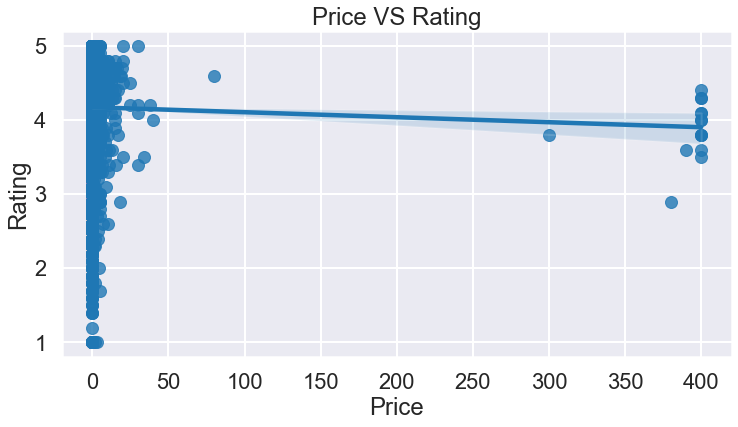

In [84]:
plt.figure(figsize=(12,6))
sns.regplot(x='Price', y='Rating', data=df)
plt.title('Price VS Rating')
plt.show()

**Observations**
- From this plot we can see a slight positive trend between price and rating: apps with higher prices tends to be slightly higher rated.

#### 6. Multivariate Analysis

##### Correlation

In [85]:
df.corr()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
Rating,1.000000,0.055081,0.063303,0.040143,-0.021199,-0.010430,0.011523,0.125843
Reviews,0.055081,1.000000,0.179320,0.625165,-0.007598,-0.033099,0.036541,0.058073
Size,0.063303,0.179320,1.000000,0.134310,-0.022397,-0.013338,0.033442,0.208094
Installs,0.040143,0.625165,0.134310,1.000000,-0.009405,-0.042036,0.043178,0.068839
Price,-0.021199,-0.007598,-0.022397,-0.009405,1.000000,-0.009106,0.007348,-0.003608
Day,-0.010430,-0.033099,-0.013338,-0.042036,-0.009106,1.000000,-0.066566,-0.015070
Month,0.011523,0.036541,0.033442,0.043178,0.007348,-0.066566,1.000000,-0.199906
Year,0.125843,0.058073,0.208094,0.068839,-0.003608,-0.015070,-0.199906,1.000000


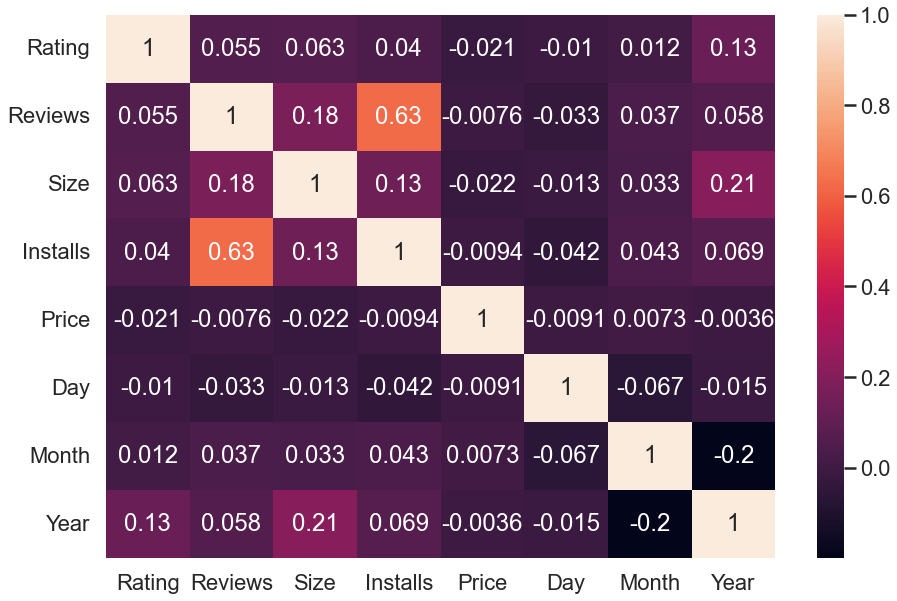

In [88]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

- Only reviews and Installs have a little bit strong positive correlattion

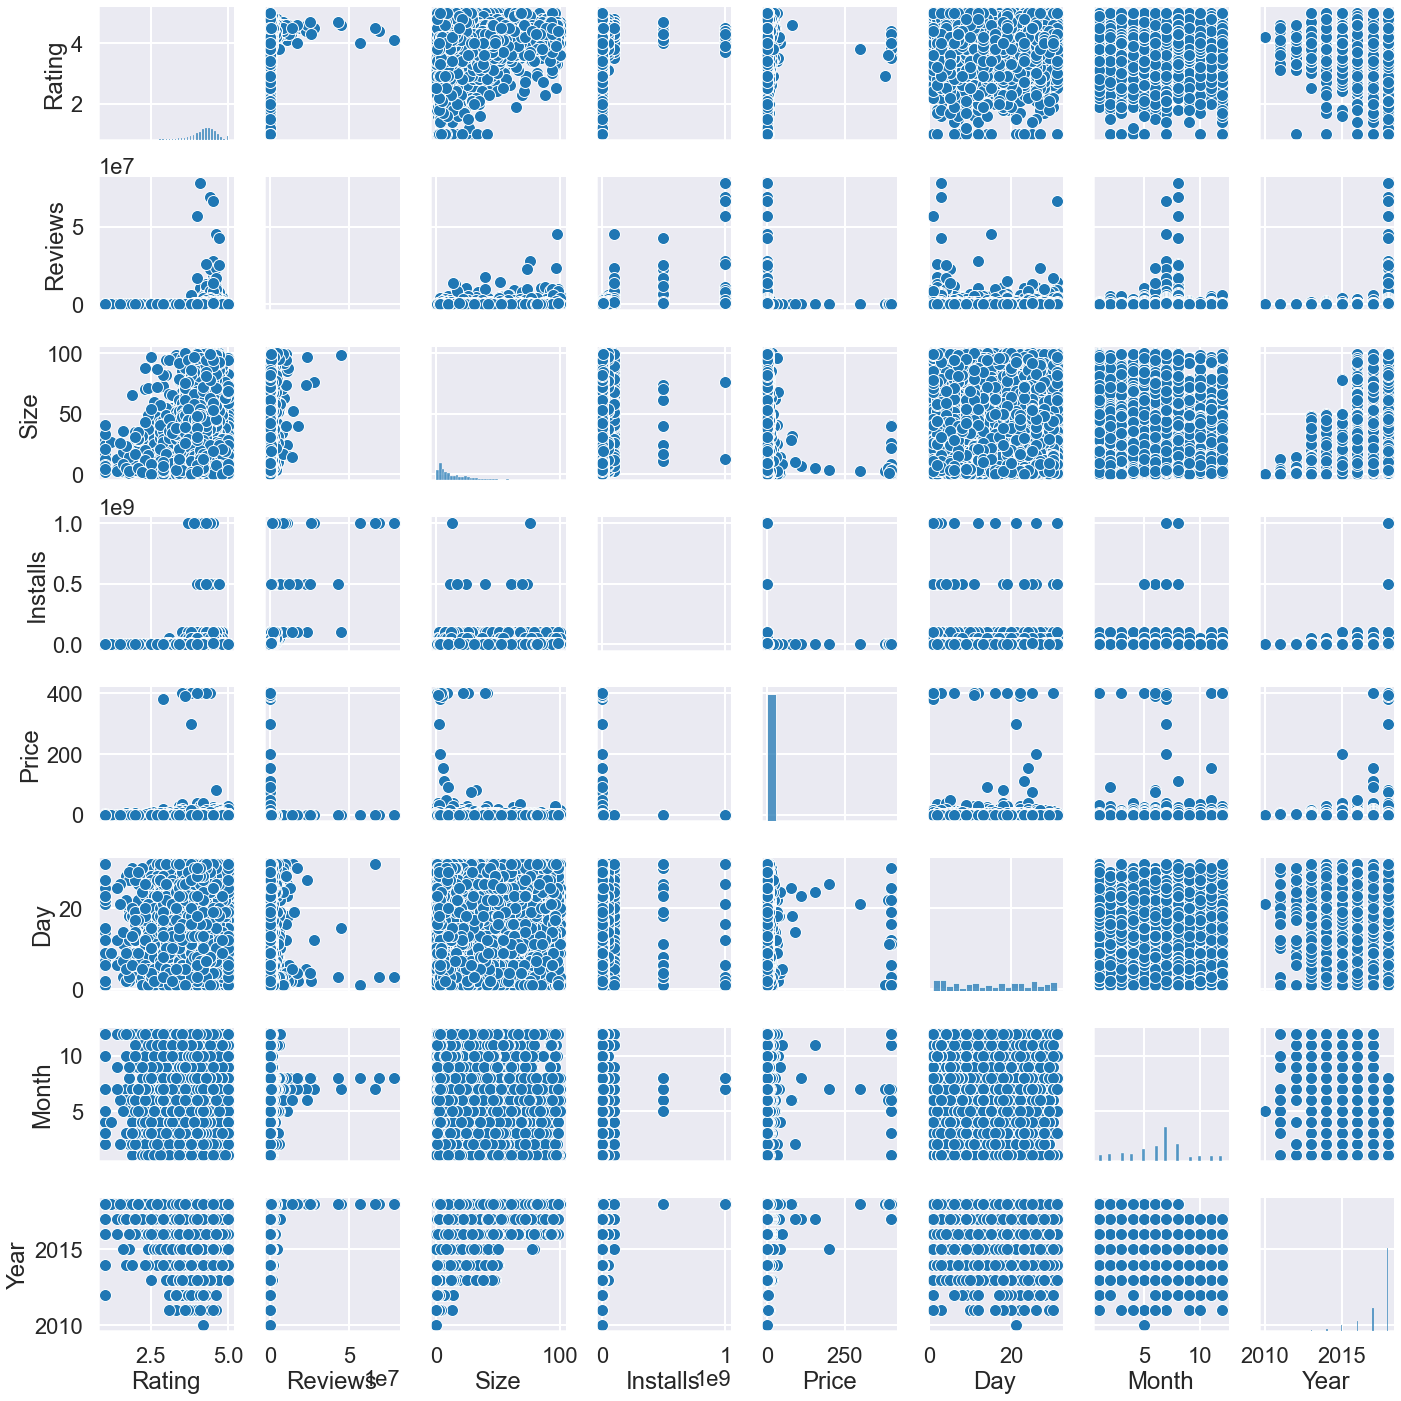

In [89]:
sns.pairplot(df)

#### Final Report
- Some values are missing in the dataset we need to take care of that while dealing with missing values
- There are some outliers we have to handle outliers also.
- Data was cleaned like formatting etc. before performing EDA
- Almost 39% of Apps are from Games, tools and family category.
- Also these three categories have highest number of installations.
- Most popular game is subway surfers
- Most popular communation and productivity apps are skype and google drive respectively.
- Google and Facebook are popular in Tools and Social category respectively.
- 271 apps have 5 rating.
- 92.6% of the apps in the app store are free.
- The apps with smaller sizes have more chance to be downloaded.
- The higher the rating, more people will be inclined to download the app.
- Better the Reviews more are the chances for the app to be downloaded by more people.
- People are always inclined to download apps that are free of cost.
- Apps that falls under the Content Rating, 'Everyone', 'Teens' and 'Everyone 10+' has the highest chance to be downloaded.
